# 异常值的处理方法

In [20]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)


In [21]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [22]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [23]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [24]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame()
Quarter_data

,Raw_return
Day,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [25]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame()
Year_data

,Raw_return
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


## 固定比例法

这种方法非常容易理解，我们把上下1%的值重新设置,若大于99%分位数的数值，则将其设置为99%分位数值，若低于1%分位数的数值，则将其重新设置为1%分位数值。

In [26]:
Month_data['2000-01':'2024-09']['Raw_return'].max()
Month_data['2000-01':'2024-09']['Raw_return'].min()

0.2744642236184609

-0.2463139446677537

In [27]:
Month_data_fix = Month_data['2000-01':'2024-09'].copy()
Month_data_fix

,Raw_return
Day,
2000-01-31,0.123242
2000-02-29,0.116990
2000-03-31,0.049948
2000-04-30,0.020053
2000-05-31,0.031710
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [28]:
Month_data_fix[Month_data_fix['Raw_return'] > Month_data_fix['Raw_return'].quantile(
    0.99)] = Month_data_fix['Raw_return'].quantile(0.99)
Month_data_fix[Month_data_fix['Raw_return'] < Month_data_fix['Raw_return'].quantile(
    0.01)] = Month_data_fix['Raw_return'].quantile(0.01)
Month_data_fix

,Raw_return
Day,
2000-01-31,0.123242
2000-02-29,0.116990
2000-03-31,0.049948
2000-04-30,0.020053
2000-05-31,0.031710
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [29]:
Month_data['2000-01':'2024-09']['Raw_return'].describe().round(8)
Month_data_fix['2000-01':'2024-09']['Raw_return'].describe().round(8)

count    297.000000
mean       0.005530
std        0.070834
min       -0.246314
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.274464
Name: Raw_return, dtype: float64

count    297.000000
mean       0.005365
std        0.068627
min       -0.203684
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.185927
Name: Raw_return, dtype: float64

## 均值标准差法

这种想法的思路来自正态分布,假设$X \sim N\left(\mu, \sigma^{2}\right)$，那么


$P(|X-\mu|>k * \sigma)= \begin{cases}0.317, & k=1 \\ 0.046, & k=2 \\ 0.003, & k=3\end{cases}$

通常把**3倍**标准差之外的值都视为异常值，不过要注意的是样本均值和样本标准差都不是稳健统计量，其计算本身受极值的影响就非常大，所以可能会出现一种情况，那就是我们从数据分布图上能非常明显地看到异常点，但按照上面的计算方法，这个异常点可能仍在均值3倍标准差的范围内。因此按照这种方法剔除掉异常值后,需要重新观察数据的分布情况，看是否仍然存在显著异常点,若存在则继续重复上述步骤寻找异常点.

In [30]:
Month_data_ms = Month_data['2000-01':'2024-09'].copy()

Month_data_ms[Month_data_ms['Raw_return'] >= Month_data_ms['Raw_return'].mean() +
         3 * Month_data_ms['Raw_return'].std()] = Month_data_ms['Raw_return'].mean(
         ) + 3 * Month_data_ms['Raw_return'].std()

Month_data_ms[Month_data_ms['Raw_return'] <= Month_data_ms['Raw_return'].mean() -
         3 * Month_data_ms['Raw_return'].std()] = Month_data_ms['Raw_return'].mean(
         ) - 3 * Month_data_ms['Raw_return'].std()
Month_data_ms

,Raw_return
Day,
2000-01-31,0.123242
2000-02-29,0.116990
2000-03-31,0.049948
2000-04-30,0.020053
2000-05-31,0.031710
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [31]:
Month_data['2000-01':'2024-09']['Raw_return'].describe().round(8)
Month_data_ms['2000-01':'2024-09']['Raw_return'].describe().round(8)

count    297.000000
mean       0.005530
std        0.070834
min       -0.246314
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.274464
Name: Raw_return, dtype: float64

count    297.000000
mean       0.005593
std        0.069359
min       -0.205210
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.218032
Name: Raw_return, dtype: float64

## MAD法

**MAD法**是针对均值标准差方法的改进,把均值和标准差替换成稳健统计量，样本均值用样本中位数代替，样本标准差用样本MAD( median absolute deviation)代替：

\begin{aligned}
&\operatorname{md}=\operatorname{median}\left(x_{i}, i=1,2, \cdots, n\right) \\
&\mathrm{MAD}=\operatorname{mean}\left(\left|x_{i}-\mathrm{md}\right|, i=1,2, \cdots, n\right)
\end{aligned}

一般将偏离中位数3倍以上的数据作为异常值，和均值标淮差法相比，其中位数和MAD不受异常值的影响。

In [32]:
Month_data_median = Month_data['2000-01':'2024-09'].copy()

median = np.median(Month_data_median['Raw_return'])
MAD = np.mean(abs(Month_data_median['Raw_return'] - median))

Month_data_median[Month_data_median['Raw_return'] >= 3 * MAD + median] = 3 * MAD + median
Month_data_median[Month_data_median['Raw_return'] <= -3 * MAD + median] = -3 * MAD + median

Month_data_median

,Raw_return
Day,
2000-01-31,0.123242
2000-02-29,0.116990
2000-03-31,0.049948
2000-04-30,0.020053
2000-05-31,0.031710
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [33]:
Month_data['2000-01':'2024-09']['Raw_return'].describe().round(8)
Month_data_median['2000-01':'2024-09']['Raw_return'].describe().round(8)

count    297.000000
mean       0.005530
std        0.070834
min       -0.246314
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.274464
Name: Raw_return, dtype: float64

count    297.000000
mean       0.005945
std        0.064574
min       -0.150058
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.158965
Name: Raw_return, dtype: float64

# 参数假设检验

In [34]:
Month_data['2000-01':'2024-09']['Raw_return'].mean()

0.005529580266316066

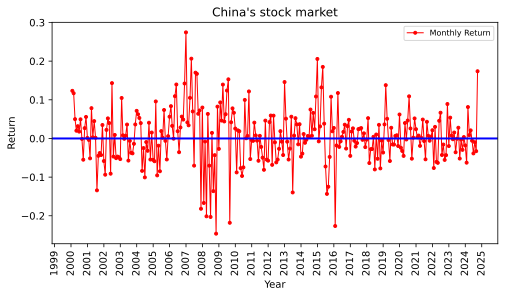

In [35]:
fig, ax = plt.subplots(figsize = (8,4))

ax.plot('Raw_return', # 图片数据
'.-', # 图片类型,
color = 'r', # 图片颜色
label = 'Monthly Return', # 图片标签
linewidth = 1, # 图片线宽
data = Month_data['2000-01':]) # 图片数据来源
ax.set_title("China's stock market") # 图片标题
ax.set_ylabel('Return') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 添加一条y=0的参考线
plt.axhline(y=0, color='blue', linewidth=2)
# plt.axhline(y=0.005546421267857977, color='green', linewidth=2)

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
plt.show();

 这个均值真的大于0么？

## 基本理论

为了推断总体的某些性质，我们会提出;总体性质的各种假设。假设检验就是根据样本提供的信息对所提出的假设作出判断的过程。

假设检验依据的原理是小概率事件在抽样中不易发生的原理。

原假设是我们有怀疑，想要拒绝的假设，记为$H_0$,备择假设是我们拒绝了原假设后得到的结论,记为$H_a$.

假设都是关于总体参数的，例如，我们想知道总体均值是否等于某个常数$\mu_0$，那么原假设是：$H_0: \mu = \mu_0$，则备择假设是：$H_a: \mu \ne \mu_0$.

上面这种假设，我们称为双尾检验，因为备择假设是双边的。

下面两种假设检验称为单尾检验：

\begin{array}{ll}
H_{0}: \mu \geqslant \mu_{0} & H_{\alpha}: \mu<\mu_{0} \\
H_{0}: \mu \leqslant \mu_{0} & H_{\alpha}: \mu>\mu_{0}
\end{array}

注意：无论是单尾还是双尾检验，等号永远都在原假设一边，这是用来判断原来假设的唯一标准.

![111](./images/CLwMG.jpg)

### 第一类错误和第二类错误

我们在做假设检验的时候会犯两种错误，第一，原来假设是正确的而你判断它为错误的; 第二，原来假设是错误的而你判断它为正确的：我们分别称为第一类错误和第二类错误。

第一类错误：原来假设是正确的，却拒绝了原来假设;
第二类错误：原来假设是错误的.却没有拒绝原来假设。

这类似于法官判案时，如果被告是好人，却判他是坏人，这是第一错误(错杀好人或以真为假）。

如果被告是坏人，却判他为好人，这是第二类错误(放走坏人或以假为真)。

在其他条什不变的前提下，如果要求犯第一类概率越小,那么犯第二类错误的概率就会越大，通俗理解即，当我们要求错杀好人的概率降低。那么往往就会放走坏人。

同样的，在其他情况不变的前提下，如果要求犯第二类错误概率越小,那么犯第一类错误的概率站越大，通俗理解即，当我们要求放走坏人的概率降低。那么往就会错杀好人。

其他条什不变主要指的是样本量$n$不变，换言之，要想少犯第一类错误的概率和第二类错误的概率，**就要增大样本量$n$**。

在假设检验的时候，我们会规定一个允许犯第一类错误的概率，比如5%，这称为显著性水平,记为$ \alpha $。我们通常只规定犯第一类错误的概率，而不规定犯第二类错误的概率。


|     | 原假设正确   | 原假设不正确       |
|:-----------:|:-------------:|:-------------:|
| 拒绝原假设  | 第一类错误 显著性水平$ \alpha $ | 判断正确 检验的势 = 1- $p$（第二类错误） |
|没有拒绝原假设 |判断正确 |第二类错误|

要做假设检验，我们先要计算两样东西：检验统计量和关键值。

检验统计量是从样本数据中计算得来的。检验统计量的一般形式为：

，检验统计量=(样本统计量一在$H_0$中假设的总体参数值)/样本统计量的标准误

关键值是查表得到的。关键值的计算需要知道以下三点：

- 检验统计量是什么分布。这决定我们要去查哪张表。
- 显著性水平。
- 是双尾还是单尾检验。

## 单个总体均值的假设检验

我们想知道一个总体均值是否等于（或大于等于、小于等于，某个常数人$\mu_0$，可以使用$Z$检验或$t$检验。双尾和单尾检验的原假设和备择假设如下:

\begin{array}{ll}
H_{0}: \mu=\mu_{0}, & H_{\alpha}: \mu \neq \mu_{0} \\
H_{0}: \mu \geqslant \mu_{0}, & H_{\alpha}: \mu<\mu_{0} \\
H_{0}: \mu \leqslant \mu_{0}, & H_{\alpha}: \mu>\mu_{0}
\end{array}

下表告诉我们什么时候使用 $ Z $  检验, 什么时候使用$ t$   检验 .

|     | 正态总体，$n < 30$   |  $ n >= 30 $      |
|:-----------:|:-------------:|:-------------:|
| 已知总体方差  | $Z$检验 | $Z$检验 |
| 未知总体方差 |$t$检验 |$t$检验 或 $Z$检验 |


如果已知总体方差，那么Z统计量的公式为
$$
Z=\frac{\bar{x}-\mu_{0}}{\sigma \sqrt{n}}
$$

其中, $\bar{x}$ 为样本均值, $\sigma$ 为总体标准差, $n$ 为样本容量。

如果末知总体方差,那么 $Z$ 统计量的公式为
$$
Z=\frac{\bar{x}-\mu_{0}}{s \sqrt{n}}
$$
其中, $\bar{x}$ 为样本均值, $s$ 为样本标准差
$\left(n>30, s^{2}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}, n<30, s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right), n$ 为样本容量。
$t$ 统计量的公式为
$$
t_{n-1}=\frac{\bar{x}-\mu_{0}}{s \sqrt{n}}
$$
其中, $\bar{x}$ 为样本均值, $s$ 为样本标准差, $n$ 为样本容量。下标$n-1$是$t$分布的自由度，这个对于关键值至关重要。

In [36]:
Month_data['2000-01':'2024-09']['Raw_return'].mean()

0.005529580266316066

In [37]:
stats.ttest_1samp(Month_data['1995-01':'2024-09']['Raw_return'],0)

TtestResult(statistic=1.8515511117890133, pvalue=0.06491819809694582, df=356)

In [38]:
stats.ttest_1samp(Month_data['2000-01':'2024-09']['Raw_return'],0)

TtestResult(statistic=1.3453254245037998, pvalue=0.17954988199447114, df=296)

 ## Question
 样本的均值和计算的Z值或者是t-value符号是否是一致的？

In [39]:
# 学生的分数数79 79 79 79 100
# 均值是多少
data = [79,79,79,79,100]
np.mean(data)

83.2

In [40]:
# t.test data
stats.ttest_1samp(data,80)

TtestResult(statistic=0.7619047619047625, pvalue=0.4885651283802229, df=4)

In [41]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

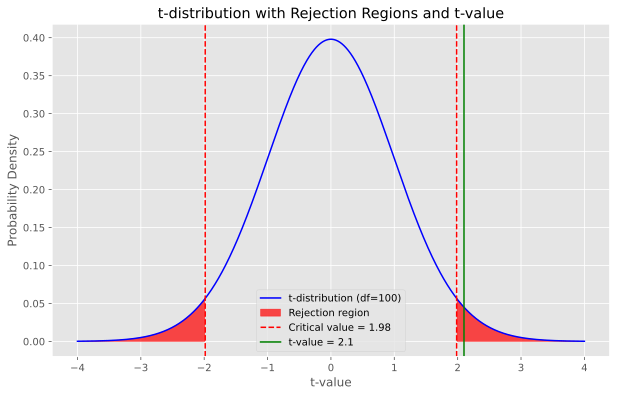

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 设置参数
alpha = 0.05  # 显著性水平
df = 100  # 自由度，假设样本量为101
t_crit = stats.t.ppf(1 - alpha / 2, df)  # 双侧检验临界值

# 生成 t 分布的 x 轴数据
x = np.linspace(-4, 4, 1000) # 生成 -4 到 4 之间的 1000 个数据
y = stats.t.pdf(x, df) # 计算 t 分布的概率密度函数

# 绘制 t 分布曲线
plt.figure(figsize=(10, 6)) # 设置图形大小
plt.style.use('ggplot') # 设置风格
plt.plot(x, y, label=f't-distribution (df={df})', color='blue') # 绘制 t 分布曲线

# 填充拒绝原假设区域
plt.fill_between(x, 0, y, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.7, label='Rejection region')

# 标出 t 临界值
plt.axvline(t_crit, color='red', linestyle='--', label=f'Critical value = {t_crit:.2f}') # 标出临界值
plt.axvline(-t_crit, color='red', linestyle='--') # 标出临界值

# 假设计算出的 t 值 (例如 t = 2.1)
t_value = 2.1
plt.axvline(t_value, color='green', linestyle='-', label=f't-value = {t_value}')

# 图形标注
plt.title('t-distribution with Rejection Regions and t-value')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()

# 显示图形
plt.show();


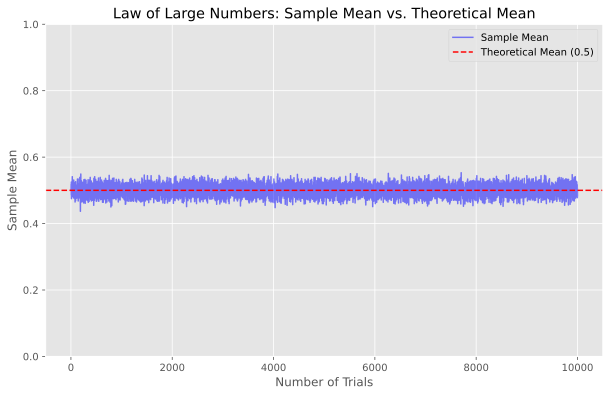

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
num_trials = 10000  # 总实验次数
num_samples = 1000  # 每次实验的样本大小
results = []  # 存储每次实验的均值

# 模拟实验
for _ in range(num_trials):
    # 抛掷硬币，0代表正面，1代表反面
    samples = np.random.binomial(n=1, p=0.5, size=num_samples) # 二项分布
    results.append(np.mean(samples))  # 计算均值并存储

# 计算总体均值
theoretical_mean = 0.5  # 理论均值（正面概率）

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_trials + 1), results, label='Sample Mean', color='blue', alpha=0.5)
plt.axhline(y=theoretical_mean, color='red', linestyle='--', label='Theoretical Mean (0.5)')
plt.title('Law of Large Numbers: Sample Mean vs. Theoretical Mean')
plt.xlabel('Number of Trials')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # 限制 y 轴范围
plt.show();


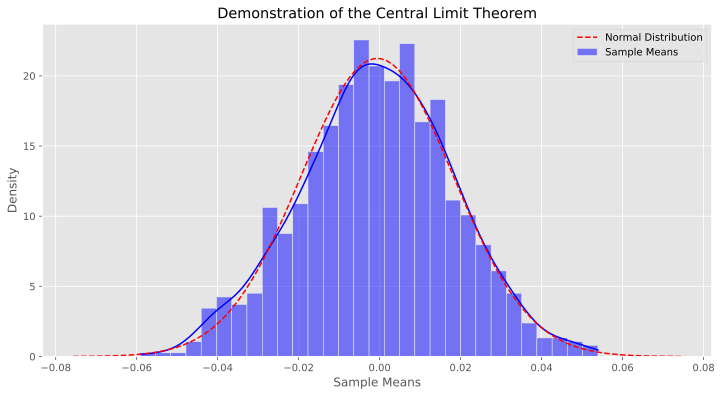

In [47]:
import seaborn as sns

# 设置参数
num_samples = 1000  # 每次抽样的样本大小
num_trials = 1000   # 抽样的次数
sample_means = []   # 存储样本均值

# 从非正态分布（例如均匀分布）中抽样
for _ in range(num_trials):
    samples = np.random.uniform(low=-1, high=1, size=num_samples)  # 生成均匀分布样本
    sample_means.append(np.mean(samples))  # 计算均值并存储

# 绘制结果
plt.figure(figsize=(12, 6))

# 绘制样本均值的分布
sns.histplot(sample_means, bins=30, kde=True, color='blue', stat='density', label='Sample Means')

# 绘制标准正态分布
mu = np.mean(sample_means)
sigma = np.std(sample_means)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linestyle='--', label='Normal Distribution')

# 图形标注
plt.title('Demonstration of the Central Limit Theorem')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show();